Lab 5 - TIER Protocol i Tidy data

Michał Hesek 406399

Import potrzebnych modułów do obróbki i prezentacji danych

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import re 

Odczyt danych z oryginalnego pliku

In [17]:
with open("../Original Data/weather.txt") as weather:
    original_data  = weather.readlines()

Parsowanie danych i przygotowanie ich do zapisu w formie tabeli

In [18]:
regex = re.compile('(\s+I|S|OI|OS|\s+SI)')
data = [] 
for line in original_data:
    line = line.replace("MIN", "MIN ")
    line = line.replace("MAX", "MAX ")
    line = line.replace("PRCP", "PRCP ")
    line = regex.sub(' ', line) 
    
    essentials = ["MX17004",line[11:15],line[15:17],line[17:21]]
    mondata = line[21:].split()
    data.append(essentials + mondata)

Odrzucamy niepoprawne i niepełne odczyty (garbage data)

In [19]:
data = data[:879]

Zapis danych do dataframe, opis kolumn odpowiada danym w nich zapisanych

In [20]:
data_frame = pd.DataFrame(data)
days = [i for i in range(1,32)]
data_frame.columns = ["weather_station","year","month","type"] + days
data_frame = pd.melt(data_frame,["weather_station","year", "month","type"])
data_frame = data_frame[data_frame.value !="-9999"] 

Konwersja danych odpowiadających dacie do bardziej czytelnej formy


In [21]:
data_frame = data_frame.assign(date = data_frame.year.astype(str) + "-" + data_frame.month.astype(str) + "-" + data_frame.variable.astype(str)[:] )
data_frame.pop("year")         
data_frame.pop("month")     
data_frame.pop("variable")
data_frame.pop("weather_station")
tidied_data = data_frame.pivot(index="date", columns="type", values="value")

Konwersja odczytu z czujnika pogody do wartości łatwych w odczycie dla człowieka

In [22]:
tidied_data["TMAX"] = pd.to_numeric(tidied_data["TMAX"])/10
tidied_data["TMIN"] = pd.to_numeric(tidied_data["TMIN"])/10
tidied_data["PRCP"] = pd.to_numeric(tidied_data["PRCP"])
print(tidied_data)

type        PRCP  TMAX  TMIN
date                        
1955-04-1      0  31.0  15.0
1955-04-10     0  33.0  17.0
1955-04-11     0  33.0  17.0
1955-04-12     0  32.0  16.0
1955-04-13     0  31.0  16.0
...          ...   ...   ...
1980-12-5      0  26.0  14.0
1980-12-6      0  27.0  15.5
1980-12-7      0  25.0  15.0
1980-12-8      0  26.5  14.0
1980-12-9      0  26.5  15.5

[8982 rows x 3 columns]


Zapis gotowej tabeli do pliku

In [23]:
data_frame.to_csv("../Analysis Data/weather.csv")

Wyświetlenie "oczyszczonych" danych, zapisane w formie przejrzystej i łatwej do plotowania.

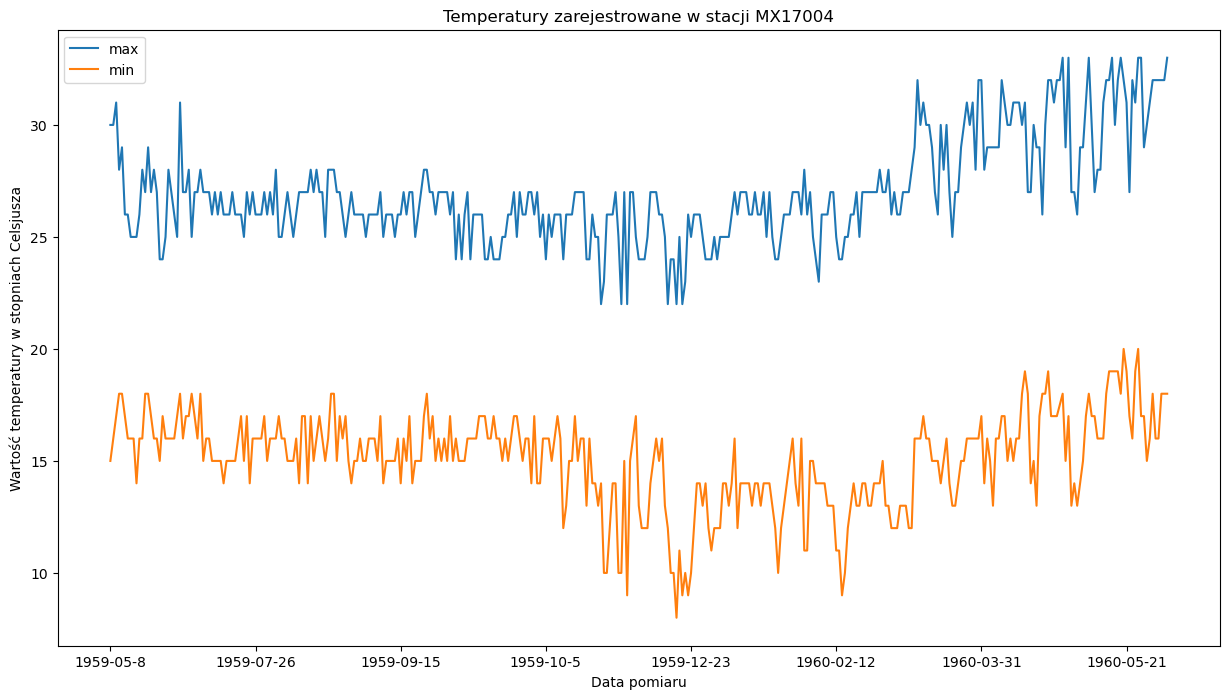

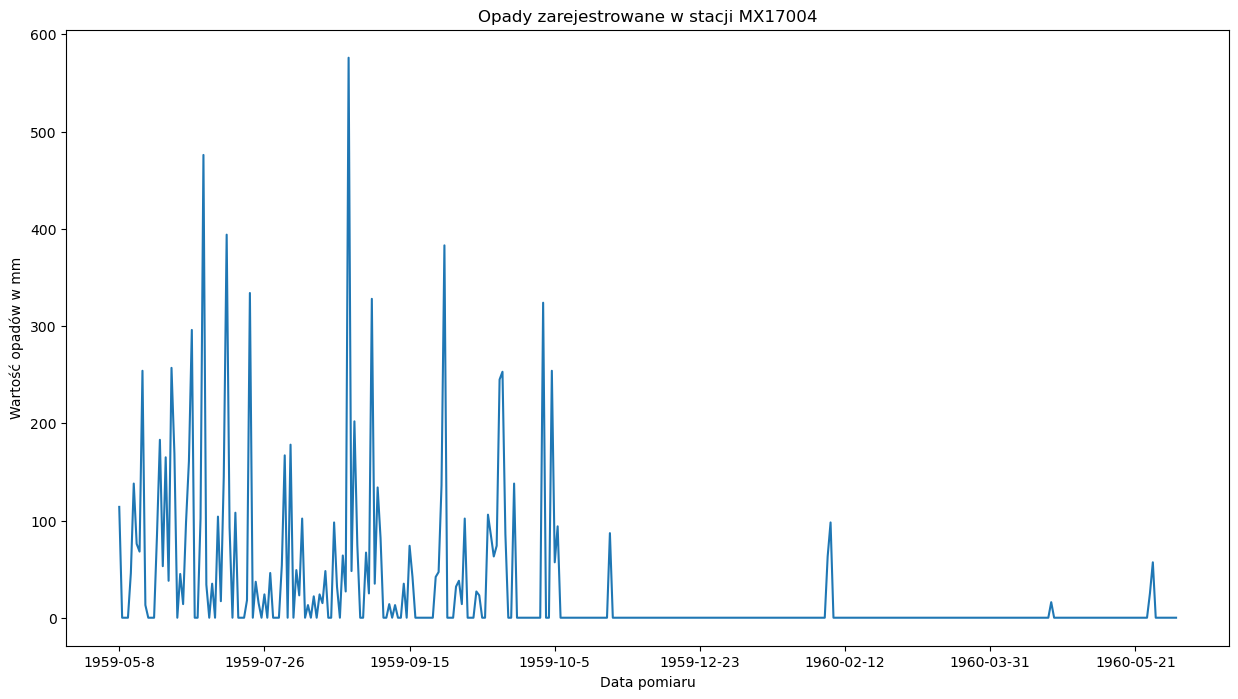

In [24]:
plt.figure(figsize=(15, 8))
tidied_data.TMAX[(4*365):(5*365)].plot()
tidied_data.TMIN[(4*365):(5*365)].plot()

plt.legend(["max","min"])
plt.title("Temperatury zarejestrowane w stacji MX17004")
plt.xlabel("Data pomiaru")
plt.ylabel("Wartość temperatury w stopniach Celsjusza")
plt.savefig("../Analysis Data/wykres-temperatur-MX17004.png")
plt.show()


plt.figure(figsize=(15, 8))
tidied_data.PRCP[(4*365):(5*365)].plot()
plt.title("Opady zarejestrowane w stacji MX17004")
plt.xlabel("Data pomiaru")
plt.ylabel("Wartość opadów w mm")
plt.savefig("../Analysis Data/wykres-opadow-MX17004.png")
plt.show()